In [9]:
import numpy as np
import matplotlib.pyplot as plt


In [10]:
import uhd
import numpy as np

usrp = uhd.usrp.MultiUSRP("type=b200")
stream_args = uhd.usrp.StreamArgs("fc32", "sc16")
stream_args.args = "spp=200" # Note this setting is not valid for all USRPs

#Creating streamer and metadata
rx_streamer = usrp.get_rx_stream(stream_args)
rx_metadata = uhd.types.RXMetadata()

#Creating receive buffer
recv_buffer = np.zeros(rx_streamer.get_max_num_samps(), dtype=np.complex64)

#Creating the stream commands
stream_cmd = uhd.types.StreamCMD(uhd.types.StreamMode.start_cont)
stream_cmd.stream_now = True

rx_streamer.issue_stream_cmd(stream_cmd)

samps = rx_streamer.recv(recv_buffer, rx_metadata)
    
stream_cmd = uhd.types.StreamCMD(uhd.types.StreamMode.stop_cont)
rx_streamer.issue_stream_cmd(stream_cmd)

[INFO] [UHD] linux; GNU C++ version 12.3.0; Boost_108200; UHD_4.6.0.HEAD-release


RuntimeError: LookupError: KeyError: No devices found for ----->
Device Address:
    type: b200


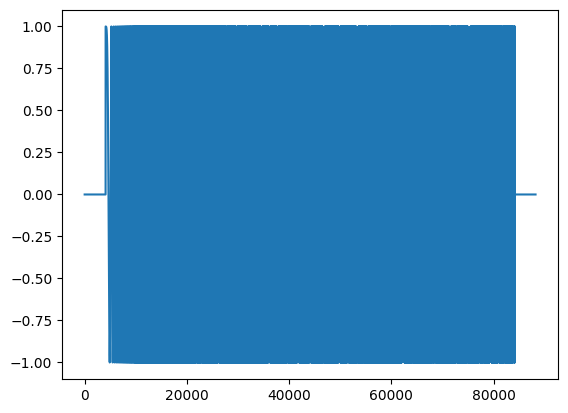

In [8]:
tx_streamer = usrp.get_tx_stream(stream_args)
tx_metadata = uhd.types.TXMetadata()
tx_buffer = np.zeros(1000000, dtype=np.complex64)
while True:
    
    samps = tx_streamer.send(tx_buffer, tx_metadata)